<a href="https://colab.research.google.com/github/juandi247/mc-2023-juan-diaz/blob/main/taller24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    valores de fi:  [ 3  5  6  5 -2  2 13]
divisores en L(i):  [ 720. -120.   48.  -36.   48. -120.  720.]

Polinomio de Lagrange, expresiones
-x*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)/24 + x*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 1)/8 - 5*x*(x - 6)*(x - 5)*(x - 4)*(x - 2)*(x - 1)/36 - x*(x - 6)*(x - 5)*(x - 3)*(x - 2)*(x - 1)/24 - x*(x - 6)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/60 + 13*x*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/720 + (x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/240

Polinomio de Lagrange: 
-11*x**6/120 + 63*x**5/40 - 119*x**4/12 + 677*x**3/24 - 4379*x**2/120 + 1123*x/60 + 3


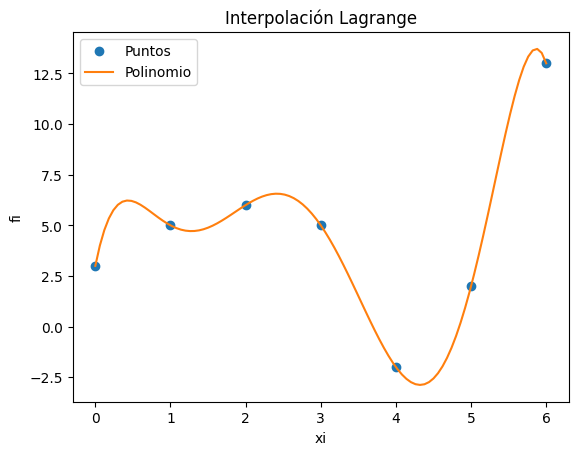

In [ ]:

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

xi = np.array([0, 1, 2, 3,4,5,6])
fi = np.array([3,5,6,5,-2,2,13])


n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    

    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador


polisimple = polinomio.expand()

px = sym.lambdify(x,polisimple)


muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)


print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()
     


In [3]:
import copy
import math

def gaussJordan(a, b):
  aAux = copy.deepcopy(a)
  bAux = b.copy()

  n = len(bAux)

  #Se construye la matriz triangular superior
  for i in range(n):
    #Pivoteo
    if aAux[i][i] == 0:
      for k in range(i + 1, n):
        if aAux[k][i] != 0:
          filaAux = aAux[i]
          aAux[i] = aAux[k]
          aAux[k] = filaAux

          valoAux = bAux[i]
          bAux[i] = bAux[k]
          bAux[k] = valoAux
          break

    #Escalonamiento
    valorAux = aAux[i][i]
    for j in range(i, n):
      aAux[i][j] /= valorAux
    bAux[i] /= valorAux

    #Reducción
    for j in range(n):
      if j != i:
        fact = aAux[j][i] / aAux[i][i]

        for k in range(n):
          aAux[j][k] -= (aAux[i][k] * fact)
        bAux[j] -= (bAux[i] * fact)
        
  return bAux

x = [0, 1, 2, 3, 4,5,6]
y = [3,5,6,5,-2,2,13]

n = len(x)

#se crea la matriz de los trazadores
a = []
b = [0] * (n - 2)
for i in range(n - 2):
  a.append(b.copy())
        
for i in range(1, n - 1):
  if i > 1:
    a[i - 1][i - 2] = x[i] - x[i - 1]
  a[i - 1][i - 1] = 2 * (x[i + 1] - x[i - 1])
  if i < n - 2:
    a[i - 1][i] = x[i + 1] - x[i]
  b[i - 1] = (6 / (x[i + 1] - x[i])) * (y[i + 1] - y[i]) + (6 / (x[i] - x[i - 1]) * (y[i - 1] - y[i]))

rtaAux = gaussJordan(a, b)
f2 = [0] + rtaAux + [0]

for i in range(1, n):
  t1 = f2[i - 1] / (6 * (x[i] - x[i - 1]))
  t2 = f2[i] / (6 * (x[i] - x[i - 1]))
  t3 = y[i - 1] / (x[i] - x[i - 1]) - f2[i - 1] * (x[i] - x[i - 1]) / 6
  t4 = y[i] / (x[i] - x[i - 1]) - f2[i] * (x[i] - x[i - 1]) / 6

  arrCoef = [0] * 4

  #Se calculan los coeficientes del polinomio
  arrCoef[0] = t1 * math.pow(x[i], 3) - t2 * math.pow(x[i - 1], 3) + t3 * x[i] - t4 * x[i - 1]
  arrCoef[1] = -t1 * 3 * math.pow(x[i], 2) + t2 * 3 * math.pow(x[i - 1], 2) - t3 + t4
  arrCoef[2] = t1 * 3 * x[i] - t2 * 3 * x[i - 1]
  arrCoef[3] = -t1 + t2

  print("f(x) = ", end="")
  for j in range(4):
    if arrCoef[j] != 0:
      if j > 0:
        print("+ ", end="")
      print(arrCoef[j], end="")
      if j == 0:
        print(" ", end="")
      elif j == 1:
        print("x ", end="")
      else:
        print("x^" + str(j) + " ", end="")

  print("{x>=" + str(x[i - 1]) + "}{x<" + str(x[i]) + "}")

f(x) = 3.0 + 2.287179487179487x + -0.2871794871794872x^3 {x>=0}{x<1}
f(x) = 2.276923076923077 + 4.456410256410257x + -2.1692307692307695x^2 + 0.435897435897436x^3 {x>=1}{x<2}
f(x) = 25.415384615384614 + -30.251282051282054x + 15.184615384615386x^2 + -2.4564102564102566x^3 {x>=2}{x<3}
f(x) = -186.43076923076924 + 181.59487179487178x + -55.43076923076923x^2 + 5.38974358974359x^3 {x>=3}{x<4}
f(x) = 293.07692307692304 + -178.03589743589743x + 34.47692307692307x^2 + -2.102564102564102x^3 {x>=4}{x<5}
f(x) = 152.6923076923077 + -93.80512820512821x + 17.630769230769232x^2 + -0.9794871794871796x^3 {x>=5}{x<6}


Reemplazando en
Lagrange= 3.4169616699218324-----------------------------------
Trazado de cubos:3.252390625